In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
img_path = r'C:\Users\arshi\Downloads\pec_img2.jpg'
img = cv2.imread(img_path)

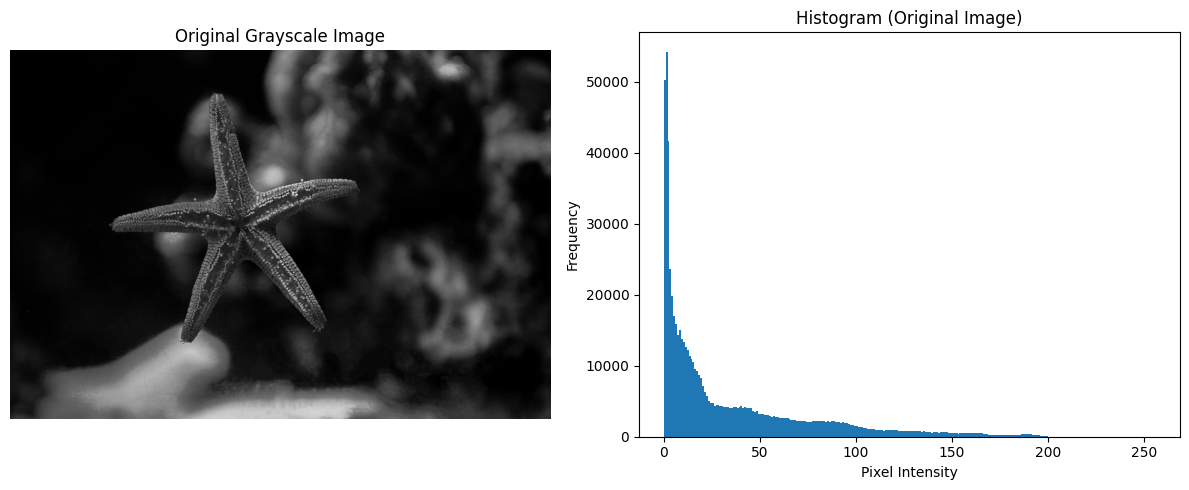

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.hist(gray.ravel(), 256, [0, 256])
plt.title('Histogram (Original Image)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

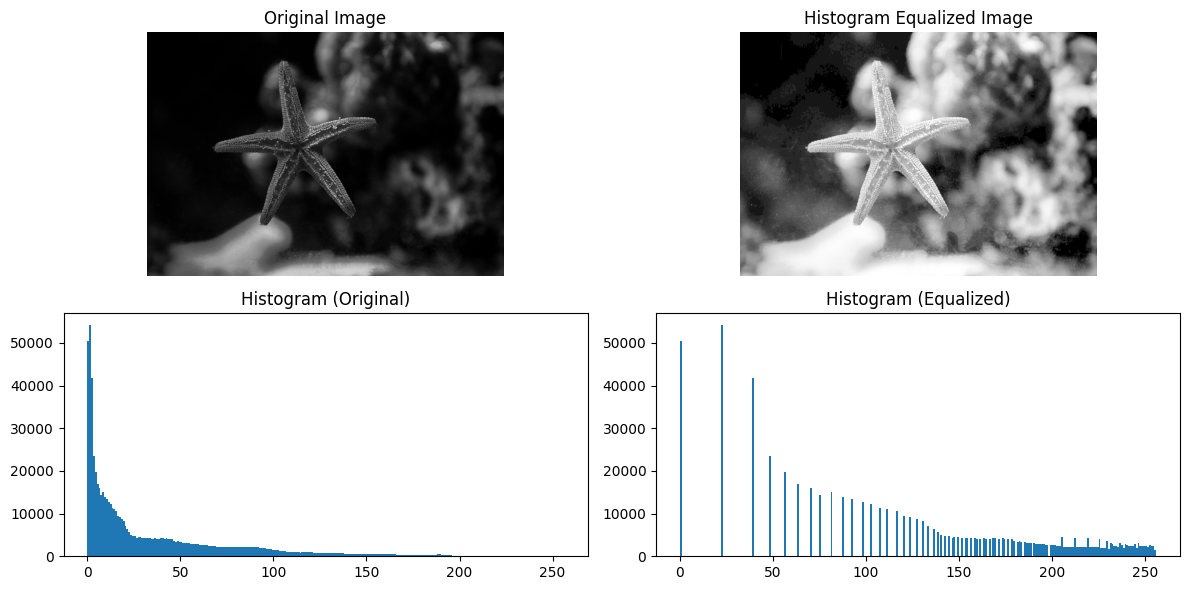

In [21]:

equalized = cv2.equalizeHist(gray)
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.hist(gray.ravel(), 256, [0, 256])
plt.title('Histogram (Original)')

plt.subplot(2, 2, 4)
plt.hist(equalized.ravel(), 256, [0, 256])
plt.title('Histogram (Equalized)')

plt.tight_layout()
plt.show()


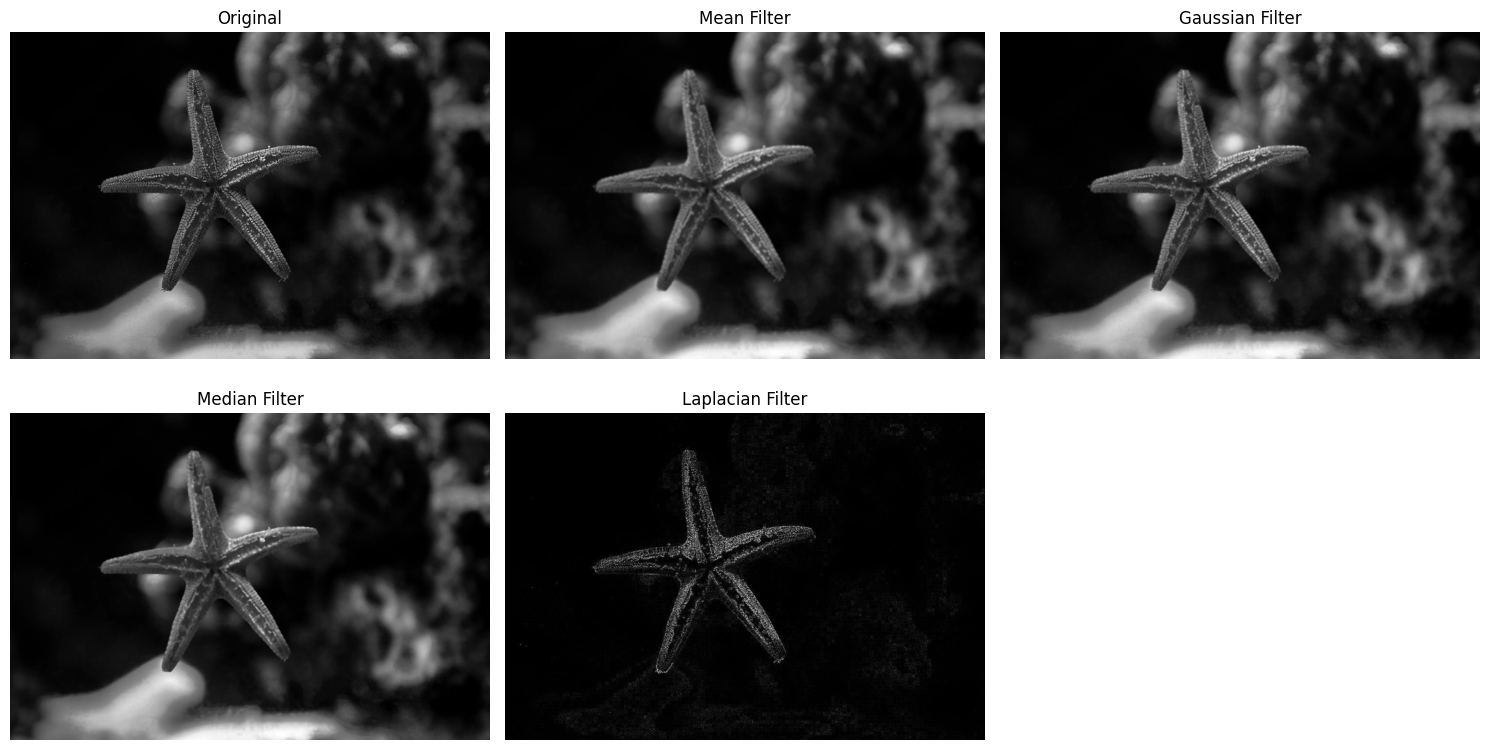

In [22]:
mean_filtered = cv2.blur(gray, (5, 5))                   
gaussian_filtered = cv2.GaussianBlur(gray, (5, 5), 0)      
median_filtered = cv2.medianBlur(gray, 5)                  
laplacian_filtered = cv2.Laplacian(gray, cv2.CV_64F)      

titles = ['Original', 'Mean Filter', 'Gaussian Filter', 'Median Filter', 'Laplacian Filter']
images = [gray, mean_filtered, gaussian_filtered, median_filtered, np.uint8(np.abs(laplacian_filtered))]

plt.figure(figsize=(15, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


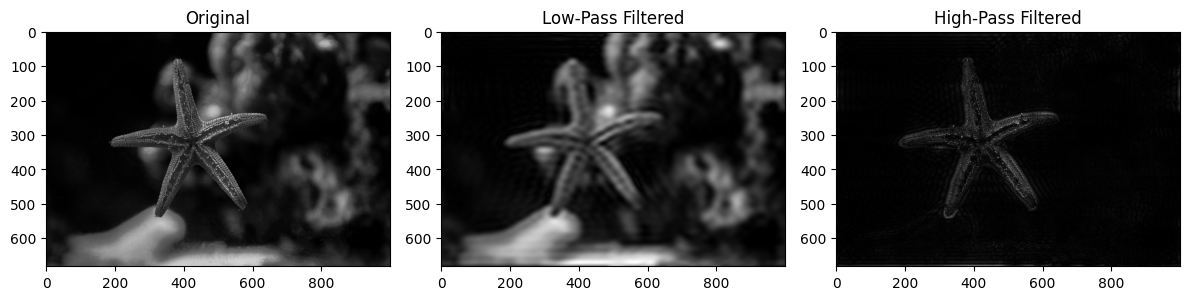

In [23]:

dft = np.fft.fft2(gray)
dft_shift = np.fft.fftshift(dft)

rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros_like(gray, dtype=np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1  

lpf_result = np.fft.ifft2(np.fft.ifftshift(dft_shift * mask))
lpf_result = np.abs(lpf_result)


hpf_mask = 1 - mask
hpf_result = np.fft.ifft2(np.fft.ifftshift(dft_shift * hpf_mask))
hpf_result = np.abs(hpf_result)


plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(lpf_result, cmap='gray')
plt.title('Low-Pass Filtered')

plt.subplot(1, 3, 3)
plt.imshow(hpf_result, cmap='gray')
plt.title('High-Pass Filtered')

plt.tight_layout()
plt.show()
